# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread('../../metrics_summary/_m/male_specific_DE_4features.txt') %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000188011.5,ENSG00000188011,RTP5,-0.3873094,2.218141e-08
ENSG00000205268.10,ENSG00000205268,PDE7A,0.1531806,2.640453e-07


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,9.993202e-18,3148,2803,666,0.2376026,0.2115629,GO:0033036,GO:BP,macromolecule localization,18123,9231,GO:0051179
2,query_1,TRUE,9.229285e-17,2670,2803,577,0.2058509,0.2161049,GO:0008104,GO:BP,protein localization,18123,3542,GO:0033036


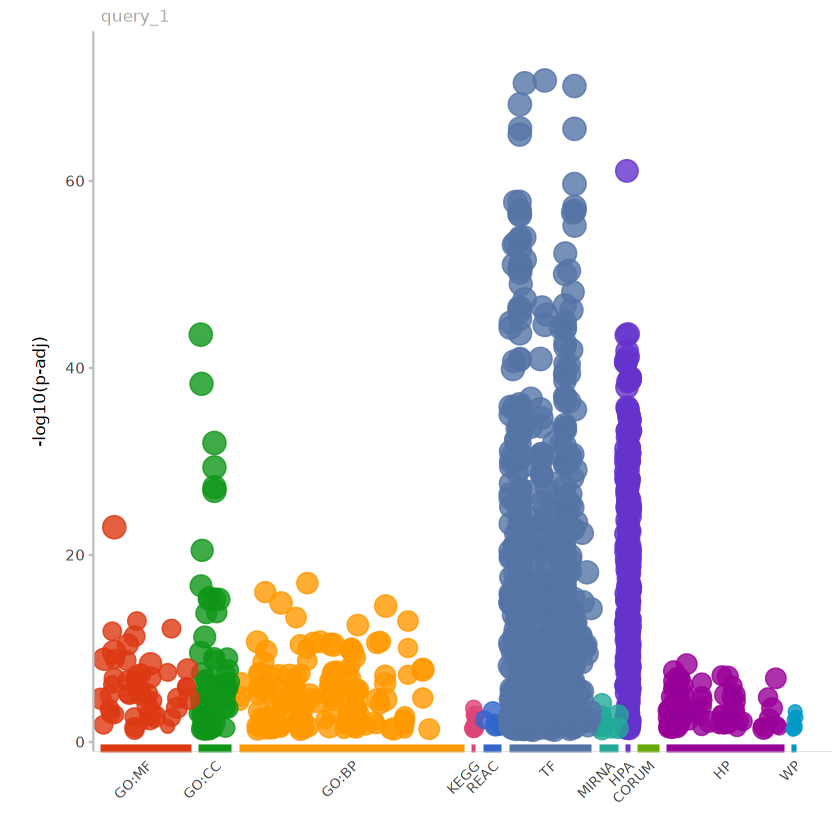

In [5]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("DEGs_manhattan", p, 9, 5)

In [6]:
deg_sz = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_sz$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "upreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(5)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,2.787323e-14,3148,1515,389,0.2567657,0.1235705,GO:0033036,GO:BP,macromolecule localization,18123,9231,GO:0051179
2,query_1,TRUE,3.736908e-13,3519,1515,420,0.2772277,0.1193521,GO:0051641,GO:BP,cellular localization,18123,16046,"GO:0009987, GO:0051179"
3,query_1,TRUE,2.492924e-11,4108,1515,467,0.3082508,0.1136806,GO:0006464,GO:BP,cellular protein modification process,18123,2456,"GO:0036211, GO:0044267"
4,query_1,TRUE,2.492924e-11,4108,1515,467,0.3082508,0.1136806,GO:0036211,GO:BP,protein modification process,18123,10969,"GO:0019538, GO:0043412"
5,query_1,TRUE,6.150338e-11,2670,1515,328,0.2165017,0.1228464,GO:0008104,GO:BP,protein localization,18123,3542,GO:0033036


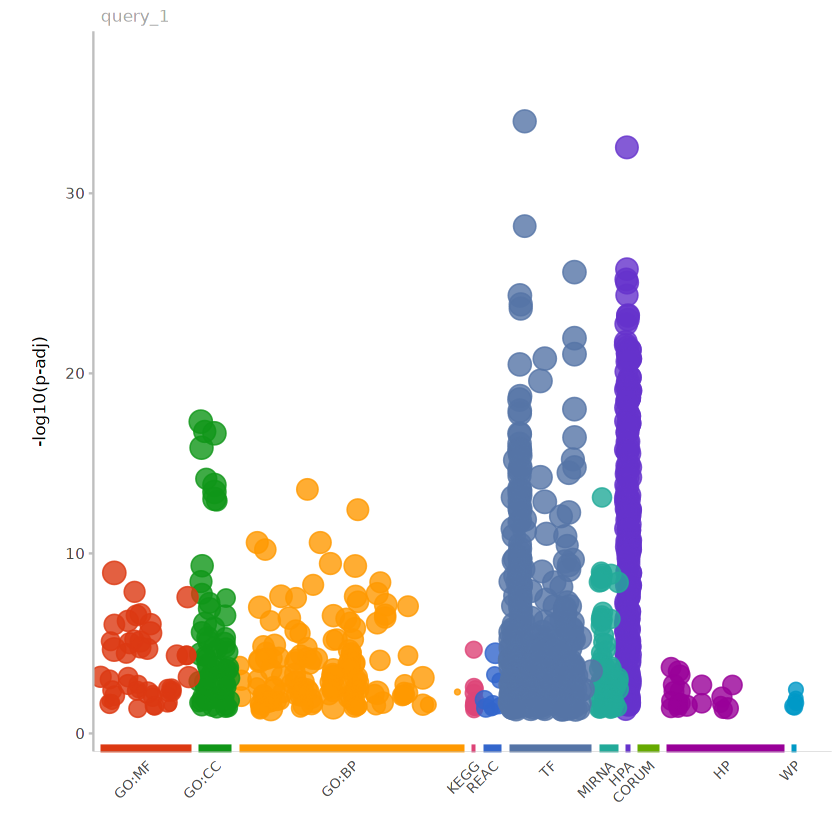

In [7]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("upreg_DEGs_manhattan", p, 9, 5)

In [8]:
deg_ctl = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_ctl$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE) 
gostres$result %>% 
    data.table::fwrite(file = "downreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.0001191973,10941,1302,876,0.67281106,0.08006581,GO:0044237,GO:BP,cellular metabolic process,18123,12725,"GO:0008152, GO:0009987"
2,query_1,TRUE,0.0001521913,493,1302,69,0.05299539,0.13995943,GO:0043087,GO:BP,regulation of GTPase activity,18123,12171,GO:0051336


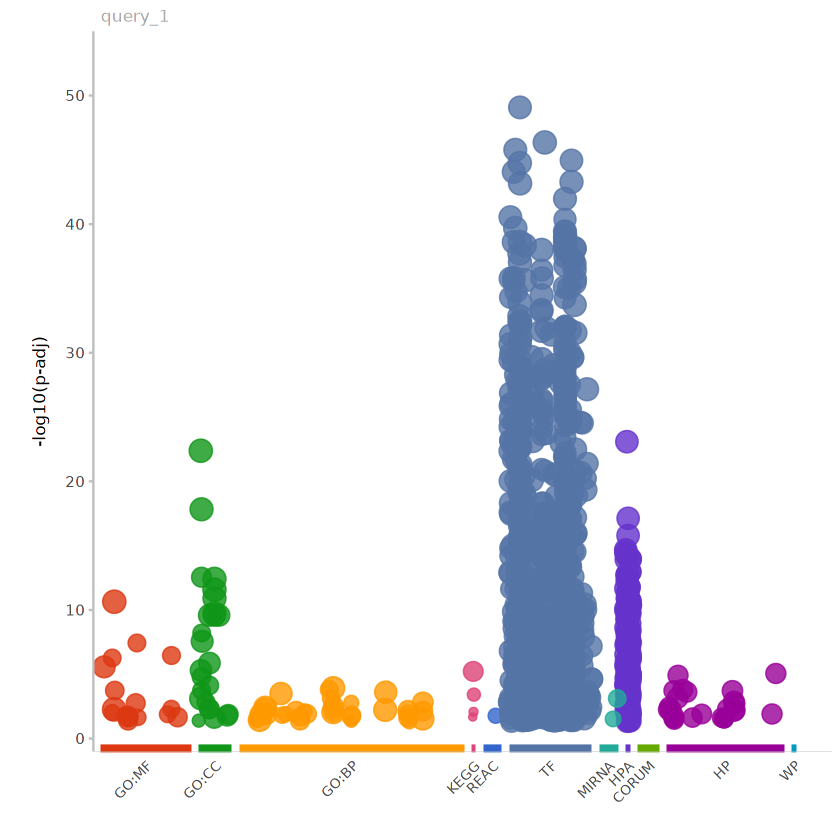

In [9]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("downreg_DEGs_manhattan", p, 9, 5)

## Reproducibility Information

In [10]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-07-14 18:03:05 EDT"

   user  system elapsed 
 10.251   0.302  24.837 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-07-14                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 bitops        1.0-7    2021-04-24 [1] CRAN (R 4.0.3)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 